In [1]:
import pandas as pd

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional


2024-12-02 14:44:30.014669: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-02 14:44:30.133145: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-02 14:44:30.238190: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733130870.345160   53536 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733130870.372802   53536 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-02 14:44:30.610847: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
X_train = pd.read_csv("/home/pavithra/projects/spam_or_ham_fsec/data/target/X_train.csv", header=None)
X_test = pd.read_csv("/home/pavithra/projects/spam_or_ham_fsec/data/target/X_test.csv", header=None)
y_train = pd.read_csv("/home/pavithra/projects/spam_or_ham_fsec/data/target/y_train.csv", header=None)
y_test = pd.read_csv("/home/pavithra/projects/spam_or_ham_fsec/data/target/y_test.csv", header=None)

print(y_train.value_counts())

print("X train ",X_train.shape)
print("X test",X_test.shape)
print("Y_Train", y_train.shape)
print("Y_test", y_test.shape)

0
0    1687
1    1519
Name: count, dtype: int64
X train  (3206, 2000)
X test (375, 2000)
Y_Train (3206, 1)
Y_test (375, 1)


In [3]:
X_train = X_train.to_numpy().reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.to_numpy().reshape(X_test.shape[0], X_test.shape[1], 1)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [4]:
import keras
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    fbeta_score,
    precision_score,
    recall_score,
)

def compile_model(model):

    model.compile(optimizer=keras.optimizers.Adam(),
                  loss=keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])

def fit_model(model, epochs, X_train, y_train,
              X_test, y_test, ):
    class_weight = {0: 1., 1: 10.}
    history = model.fit(X_train, y_train,
                validation_data=(X_test, y_test),
                epochs=epochs,
                batch_size=64,
                verbose=1,
                class_weight=class_weight)

    return history


def get_classification_metrics(y_test: pd.DataFrame, y_pred: pd.DataFrame) -> dict[str, str]:
    """
    Returns the classification report as a dictionary.
    """
    return {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "fb_score": fbeta_score(y_test, y_pred, beta=0.2),
    }


In [5]:
def create_model():
    """
    Create and return the model I wanna try on.
    Which is a nueral network with one hidden layer and a dropout layer.
    """
    model = Sequential()

    model.add(Bidirectional(LSTM(128, return_sequences=True, input_shape=(1,))))
    model.add(Dropout(0.2))

    model.add(Bidirectional(LSTM(64, return_sequences=False)))
    model.add(Dropout(0.2))

    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    return model

model = create_model()

model.compile(optimizer=keras.optimizers.Adam(),
                  loss=keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])
history = fit_model(model, 10, X_train, y_train, X_test, y_test)


2024-12-02 14:44:36.166434: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/pavithra/projects/spam_or_ham_fsec/spam_ham_env/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 255s 5s/step - accuracy: 0.6184 - loss: 1.7723 - val_accuracy: 0.1147 - val_loss: 3.9531
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 217s 4s/step - accuracy: 0.9976 - loss: 0.1180 - val_accuracy: 0.1547 - val_loss: 5.5466
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 219s 4s/step - accuracy: 0.9890 - loss: 0.2445 - val_accuracy: 0.1200 - val_loss: 4.5488
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 216s 4s/step - accuracy: 0.9825 - loss: 0.1537 - val_accuracy: 0.7067 - val_loss: 0.5802
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 234s 5s/step - accuracy: 0.9831 - loss: 0.1211 - val_accuracy: 0.1120 - val_loss: 3.5887
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 255s 5s/step - accuracy: 0.9895 - loss: 0.0857 - val_accuracy: 0.1253 - val_loss: 4.5173
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 221s 4s/step - accuracy: 0.9958 - loss: 0.0757 - val_accuracy: 0.1227 - val_loss: 5.0143
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 233s 5s/step - accuracy: 0.9926 - loss: 0.0942 - val_accuracy: 0.6187 - v

In [6]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)
get_classification_metrics(y_test, y_pred_binary)

12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step


{'accuracy': 0.21866666666666668,
 'precision': np.float64(0.09523809523809523),
 'recall': np.float64(0.7894736842105263),
 'f1_score': np.float64(0.16997167138810199),
 'confusion_matrix': array([[ 52, 285],
        [  8,  30]]),
 'fb_score': np.float64(0.09857197017566031)}

In [7]:
model.save("lstm_bidi.h5")

In [8]:
import dagshub
import mlflow
dagshub.init(repo_owner='pavipd495', repo_name='spam_or_ham_fsec', mlflow=True)
mlflow.set_experiment("Spam_Or_Ham")


with mlflow.start_run(run_name="dl_lstm_bidus_0_9_os_09_2k"):

    # # Get the predictions.
    # y_pred = model.predict(X_test)
    # y_pred = (y_pred >= 0.5).astype(int)

    # Log metrics to mlflow.
    metrics = get_classification_metrics(y_test=y_test, y_pred=y_pred_binary)
    mlflow.log_metric("accuracy", metrics["accuracy"],)
    mlflow.log_metric("precision", metrics["precision"])
    mlflow.log_metric("recall", metrics["recall"])
    mlflow.log_metric("f1_score", metrics["f1_score"])

    mlflow.keras.log_model(model, "dl_lstm_bidus_0_9_os_09_2k")

Accessing as pavipd495

Initialized MLflow to track repo "pavipd495/spam_or_ham_fsec"

Repository pavipd495/spam_or_ham_fsec initialized!

2024/12/02 15:25:04 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/02 15:25:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run dl_lstm_bidus_0_9_os_09_2k at: https://dagshub.com/pavipd495/spam_or_ham_fsec.mlflow/#/experiments/2/runs/edf7f83eaffe4182bbd680be7e196736
🧪 View experiment at: https://dagshub.com/pavipd495/spam_or_ham_fsec.mlflow/#/experiments/2


In [1]:
# Predict the model, get the model from mlflow registery and predict.

import mlflow
import dagshub
import pandas as pd

# Initialize the dagshub repo information.
dagshub.init(repo_owner='pavipd495', repo_name='spam_or_ham_fsec', mlflow=True)


# Model to pull.
model_name = "Bidirectional_lstm"
model_version = 1
model = mlflow.pyfunc.load_model(model_uri=f"models:/{model_name}/{model_version}")


Accessing as pavipd495

Initialized MLflow to track repo "pavipd495/spam_or_ham_fsec"

Repository pavipd495/spam_or_ham_fsec initialized!

2024-12-03 11:05:48.517022: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 11:05:48.521601: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 11:05:48.541291: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733204148.559864   12405 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733204148.566189   12405 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 11:05:48.583268: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [5]:
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 721ms/step


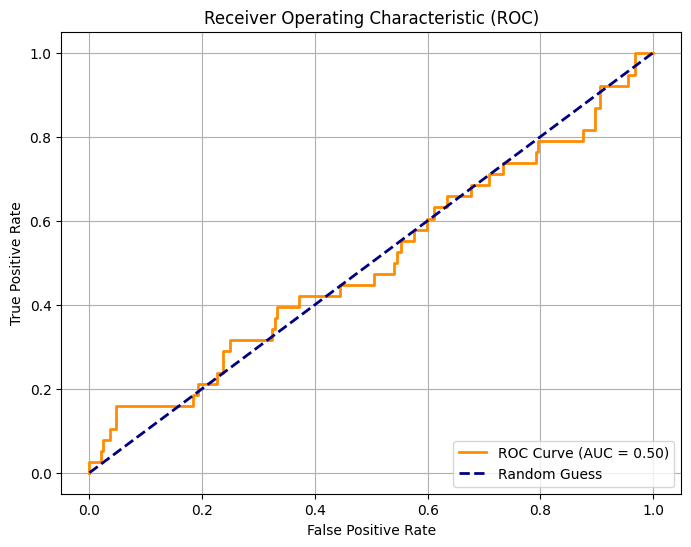

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc




fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Step 5: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Optimal Threshold (Max F1-Score): 1.00
Precision: 0.27, Recall: 0.16, F1-Score: 0.20


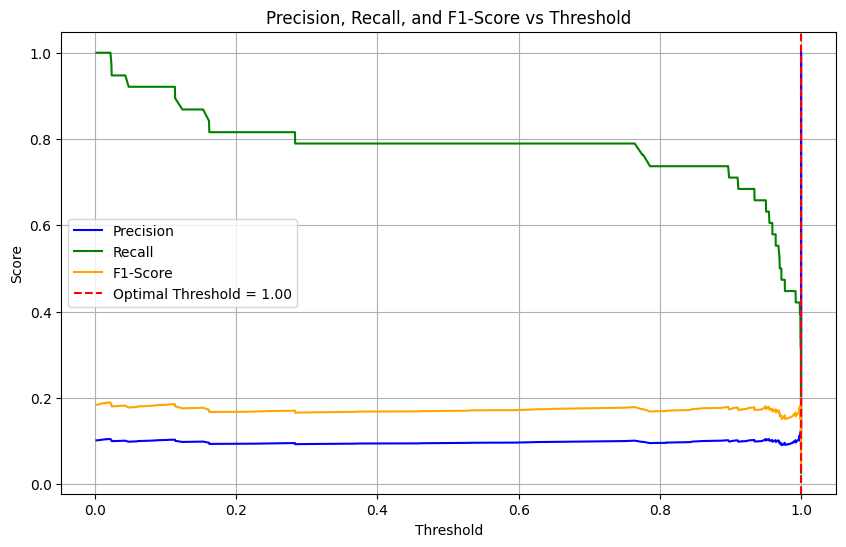

In [8]:
from sklearn.metrics import precision_recall_curve, f1_score

# Step 1: Compute Precision, Recall, and Thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

# Step 2: Compute F1-Score for Each Threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Avoid division by zero

# Step 3: Select Threshold with the Highest F1-Score
optimal_idx = f1_scores.argmax()
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold (Max F1-Score): {optimal_threshold:.2f}")
print(f"Precision: {precisions[optimal_idx]:.2f}, Recall: {recalls[optimal_idx]:.2f}, F1-Score: {f1_scores[optimal_idx]:.2f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label="Precision", color="blue")
plt.plot(thresholds, recalls[:-1], label="Recall", color="green")
plt.plot(thresholds, f1_scores[:-1], label="F1-Score", color="orange")
plt.axvline(x=optimal_threshold, color="red", linestyle="--", label=f"Optimal Threshold = {optimal_threshold:.2f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-Score vs Threshold")
plt.legend()
plt.grid()
plt.show()
